# RDS Lab 7

Put this Jupyter notebook into the root directory of the DataSynthesizer downloaded from [GitHub](https://github.com/DataResponsibly/DataSynthesizer).

## Install DataSynthesizer

In [1]:
# Add the direcotry of DataSynthesizer into sys.path before importing the code
import os, sys
module_dir = os.getcwd() + '/DataSynthesizer/'
sys.path.append(module_dir)

# print(f'Adding into sys.path: {module_dir}')

In [2]:
from DataDescriber import DataDescriber
from DataGenerator import DataGenerator
from ModelInspector import ModelInspector

In [3]:
describer = DataDescriber()
generator = DataGenerator()

## Modules and Parameters

In [4]:
from lib.utils import read_json_file

import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sensitive_data_file = './data/adult_reduced.csv'
description_files = {'random mode':                   './out/description(random).json', 
                     'independent attribute mode':    './out/description(independent).json', 
                     'correlated attribute mode':     './out/description(correlated).json'}
synthetic_data_files = {'random mode':                './out/synthetic data(random).csv', 
                        'independent attribute mode': './out/synthetic data(independent).csv', 
                        'correlated attribute mode':  './out/synthetic data(correlated).csv'}


output_data_size = 1000

In [6]:
real_data = pd.read_csv(sensitive_data_file)
real_data.head()

,age,education,sex,relationship,marital-status,income
0,39,Bachelors,Male,Not-in-family,Never-married,<=50K
1,50,Bachelors,Male,Husband,Married-civ-spouse,<=50K
2,38,HS-grad,Male,Not-in-family,Divorced,<=50K
3,53,11th,Male,Husband,Married-civ-spouse,<=50K
4,28,Bachelors,Female,Wife,Married-civ-spouse,<=50K


## Random mode

In [7]:
describer.describe_dataset_in_random_mode(sensitive_data_file)

In [8]:
describer.save_dataset_description_to_file(description_files['random mode'])

#### Important parameters here

- __seed__: initialize the random number generator for both `random` and `np.random`
- __mininum__, __maxmimum__: hide the min/max informtion in the sensitive data 

In [9]:
generator.generate_dataset_in_random_mode(n=output_data_size, description_file=description_files['random mode'], seed=0, minimum=0, maximum=100)

In [10]:
generator.save_synthetic_data(synthetic_data_files['random mode'])

In [11]:
synthetic_random = pd.read_csv(synthetic_data_files['random mode'])

In [12]:
synthetic_random.head()

,age,education,sex,relationship,marital-status,income
0,44,wtpwnllb,Female,Husband,Married-spouse-absent,<=50K
1,47,hxqhpwae,Male,Not-in-family,Married-spouse-absent,<=50K
2,64,sxvcikfg,Male,Husband,Married-AF-spouse,<=50K
3,67,gebveffg,Male,Own-child,Never-married,<=50K
4,67,dyrpusjx,Male,Not-in-family,Widowed,>50K


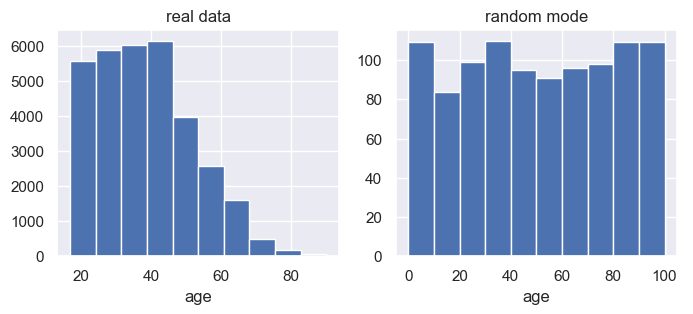

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=100)
axes[0].hist(real_data['age'])
axes[1].hist(synthetic_random['age'])
axes[0].set_xlabel('age')
axes[1].set_xlabel('age')
axes[0].set_title('real data')
axes[1].set_title('random mode');

In [14]:
relationship_real = real_data['relationship'].value_counts()
relationship_random = synthetic_random['relationship'].value_counts()
relationship_both = pd.merge(relationship_real.to_frame(), relationship_random.to_frame(), 
                             left_index=True, right_index=True, 
                             suffixes=('_real', '_random_mode'))
relationship_both

,relationship_real,relationship_random_mode
Husband,13193,179
Not-in-family,8305,179
Own-child,5068,147
Unmarried,3446,169
Wife,1568,162
Other-relative,981,164


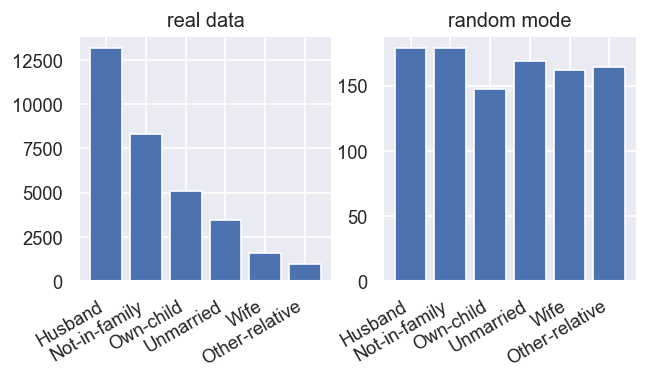

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=120)
axes[0].bar(relationship_both.index, relationship_both['relationship_real'])
axes[1].bar(relationship_both.index, relationship_both['relationship_random_mode'])
axes[0].set_title('real data')
axes[1].set_title('random mode')
fig.autofmt_xdate()

In [16]:
description_json = read_json_file(description_files['random mode'])

In [17]:
print(json.dumps(description_json['attribute_description']['relationship'], indent=4))

{
    "name": "relationship",
    "data_type": "String",
    "is_categorical": true,
    "is_candidate_key": false,
    "min": 4,
    "max": 14,
    "missing_rate": 0.0,
    "distribution_bins": [
        "Not-in-family",
        "Husband",
        "Wife",
        "Own-child",
        "Unmarried",
        "Other-relative"
    ],
    "distribution_probabilities": [
        0.16666666666666666,
        0.16666666666666666,
        0.16666666666666666,
        0.16666666666666666,
        0.16666666666666666,
        0.16666666666666666
    ]
}


## Independent attribute mode

In [18]:
describer.describe_dataset_in_independent_attribute_mode(sensitive_data_file, epsilon=0.1)

In [19]:
describer.save_dataset_description_to_file(description_files['independent attribute mode'])

In [20]:
generator.generate_dataset_in_independent_mode(n=output_data_size, description_file=description_files['independent attribute mode'], seed=0)

In [21]:
generator.save_synthetic_data(synthetic_data_files['independent attribute mode'])

In [22]:
synthetic_independent = pd.read_csv(synthetic_data_files['independent attribute mode'])

In [23]:
synthetic_independent.head()

,age,education,sex,relationship,marital-status,income
0,41.0,lpvermmqc,Male,Husband,Never-married,>50K
1,45.0,fuc,Female,Unmarried,Divorced,<=50K
2,40.0,xtvpge,Female,Not-in-family,Married-civ-spouse,<=50K
3,39.0,jypakqcwr,Male,Unmarried,Married-civ-spouse,<=50K
4,33.0,ofz,Female,Unmarried,Divorced,<=50K


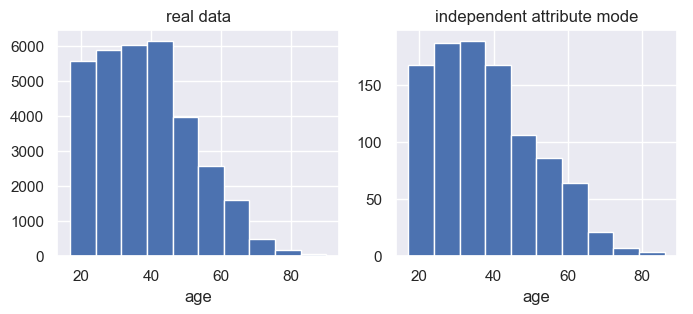

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=100)
axes[0].hist(real_data['age'])
axes[1].hist(synthetic_independent['age'])
axes[0].set_xlabel('age')
axes[1].set_xlabel('age')
axes[0].set_title('real data')
axes[1].set_title('independent attribute mode');

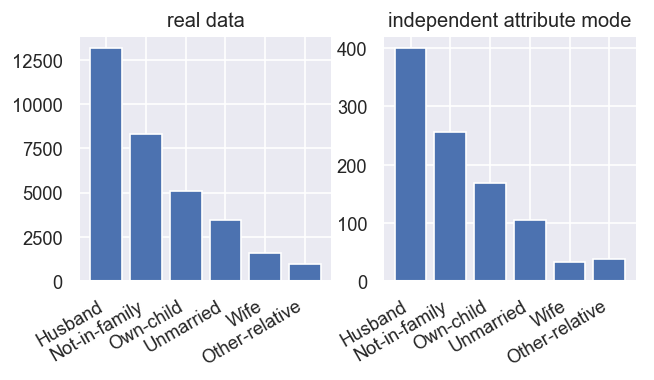

In [25]:
relationship_real = real_data['relationship'].value_counts()
relationship_independent = synthetic_independent['relationship'].value_counts()
relationship_both = pd.merge(relationship_real.to_frame(), relationship_independent.to_frame(), 
                             left_index=True, right_index=True, 
                             suffixes=('_real', '_independent_attribute_mode'))

fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=120)
axes[0].bar(relationship_both.index, relationship_both['relationship_real'])
axes[1].bar(relationship_both.index, relationship_both['relationship_independent_attribute_mode'])
axes[0].set_title('real data')
axes[1].set_title('independent attribute mode')
fig.autofmt_xdate()

## Correlated attribute mode

In [26]:
describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, epsilon=0.1, k=2)

================ Constructing Bayesian Network (BN) ================
Adding ROOT relationship
Adding attribute marital-status
Adding attribute sex
Adding attribute income
Adding attribute age
========================= BN constructed =========================


In [27]:
from lib.utils import display_bayesian_network

In [28]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    marital-status has parents ['relationship'].
    sex            has parents ['marital-status', 'relationship'].
    income         has parents ['sex', 'marital-status'].
    age            has parents ['income', 'relationship'].


In [29]:
describer.save_dataset_description_to_file(description_files['correlated attribute mode'])

In [30]:
generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, description_file=description_files['correlated attribute mode'], seed=0)

In [31]:
generator.save_synthetic_data(synthetic_data_files['correlated attribute mode'])

In [32]:
synthetic_correlated = pd.read_csv(synthetic_data_files['correlated attribute mode'])

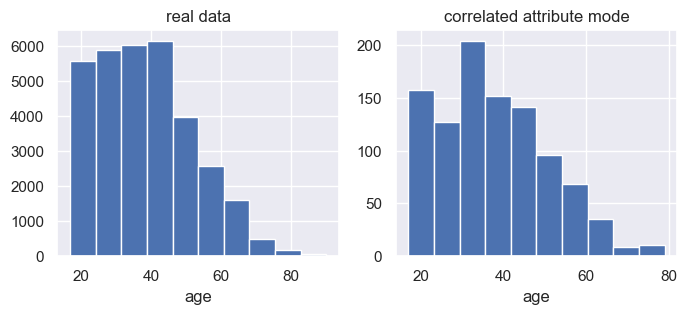

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=100)
axes[0].hist(real_data['age'])
axes[1].hist(synthetic_correlated['age'])
axes[0].set_xlabel('age')
axes[1].set_xlabel('age')
axes[0].set_title('real data')
axes[1].set_title('correlated attribute mode');

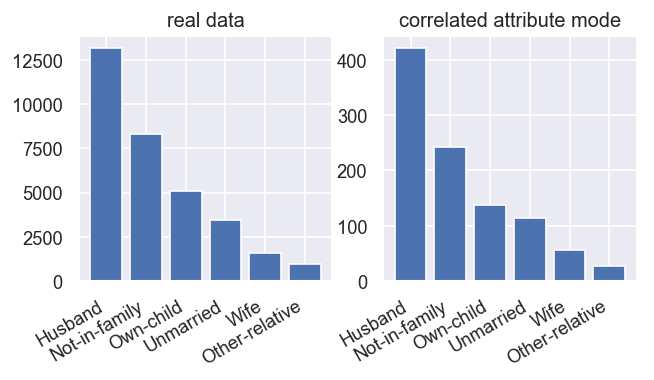

In [34]:
relationship_real = real_data['relationship'].value_counts()
relationship_correlated = synthetic_correlated['relationship'].value_counts()
relationship_both = pd.merge(relationship_real.to_frame(), relationship_correlated.to_frame(), 
                             left_index=True, right_index=True, 
                             suffixes=('_real', '_correlated_attribute_mode'))

fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=120)
axes[0].bar(relationship_both.index, relationship_both['relationship_real'])
axes[1].bar(relationship_both.index, relationship_both['relationship_correlated_attribute_mode'])
axes[0].set_title('real data')
axes[1].set_title('correlated attribute mode')
fig.autofmt_xdate()

In [35]:
from lib.utils import read_json_file

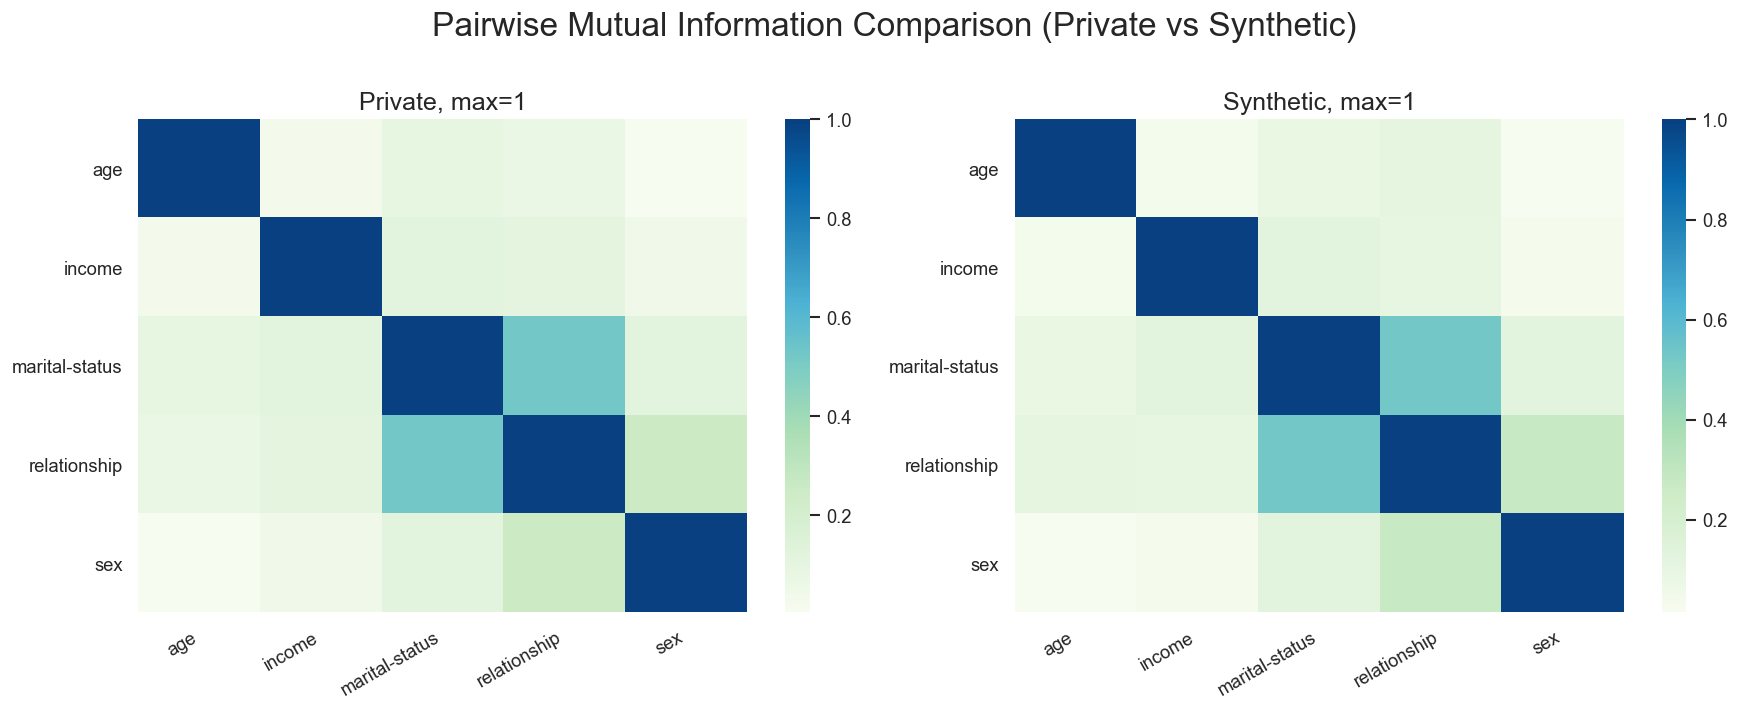

In [36]:
attribute_description = read_json_file(description_files['correlated attribute mode'])['attribute_description']
ModelInspector(real_data, synthetic_correlated, attribute_description).mutual_information_heatmap()

## Statistical measures

### Mutual information

In [37]:
from sklearn.metrics import normalized_mutual_info_score

In [38]:
normalized_mutual_info_score(real_data['marital-status'], real_data['relationship'], average_method='arithmetic')

0.5249037668258572

### Two-sample Kolmogorov–Smirnov test

In [41]:
from scipy.stats import ks_2samp

In [42]:
ks_2samp?

__Note__: In HW2, you can report only the statistic value, and ignore the p-value.

In [43]:
ks_2samp(real_data['age'], synthetic_random['age'])

Ks_2sampResult(statistic=0.33259405423666355, pvalue=2.1917953327374403e-94)

In [44]:
ks_2samp(real_data['age'], synthetic_independent['age'])

Ks_2sampResult(statistic=0.05253290746598688, pvalue=0.009055657155858102)

In [45]:
ks_2samp(real_data['age'], synthetic_correlated['age'])

Ks_2sampResult(statistic=0.040660452688799475, pvalue=0.07883237011822643)

### KL-divergence

In [46]:
from scipy.stats import entropy

In [47]:
entropy?

In [48]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_divergence(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], df_in[attr].value_counts().index)
    return entropy(distribution_out, distribution_in)

In [49]:
kl_divergence(real_data, synthetic_random, 'relationship')

0.3354938102771519

In [50]:
kl_divergence(real_data, synthetic_independent, 'relationship')

0.004010503181905843

In [51]:
kl_divergence(real_data, synthetic_correlated, 'relationship')

0.0027570713157389955

### Boxplot

In [52]:
import seaborn as sns

In [53]:
real_data.head()

,age,sex,relationship,marital-status,income
0,39,Male,Not-in-family,Never-married,<=50K
1,50,Male,Husband,Married-civ-spouse,<=50K
2,38,Male,Not-in-family,Divorced,<=50K
3,53,Male,Husband,Married-civ-spouse,<=50K
4,28,Female,Wife,Married-civ-spouse,<=50K


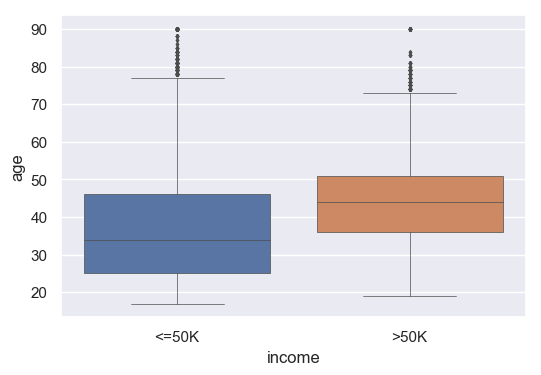

In [54]:
plt.figure(dpi=100)
sns.boxplot(x='income', y='age', data=real_data, linewidth=0.5, fliersize=2);